# City Size Distribuion

This notebook contains analysis and visualizations for:

1. Investigating the distribution of sizes of African cities, towns, and villages.
2. Determining how these distributions have changed over the period 2000-2020.
3. Examining the trajectoris of individuals cities or groups of cities

In [1]:
# Read in the data.
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

working_directory = "../../temp_data/"

In [2]:
def p_X_gt_x(data, X=None):
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data>=x)/n_data for x in X ])

def p_X_lt_x(data, X=None):
    n_data = len(data)
    if X is None:
        X = data.unique()
    return X, pd.Series([sum(data<=x)/n_data for x in X ])

## 2000 World Pop Data

In [3]:
data_file = '20181116_WP2000_pops.csv'
variable = 'Wpop2000'
year = 2000

Text(0,0.5,'P[X>=x]')

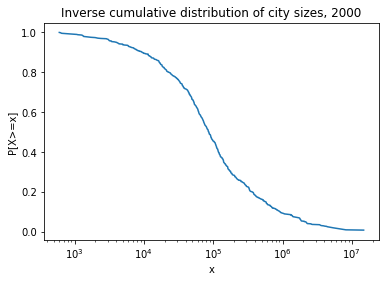

In [4]:
datafile = working_directory + data_file
df = pd.read_csv(datafile)
df = df[df[variable] >= 0]  # Remove any cities that have populations less than zero (caused by raster -9999 masking)

# Generate the inverse cumulative distribution plot for 2000
data_2000 = df[variable].sort_values()
X, y = p_X_gt_x(data_2000)

# Render the inverse cumulative distribution plot for 2000
plt.plot(X,y)
plt.xscale('log')
plt.title('Inverse cumulative distribution of city sizes, {year}'.format(year=year))
plt.xlabel('x')
plt.ylabel('P[X>=x]')

# 2020 World Pop Data

In [5]:
data_file = '20181116_WP2020_pops.csv'
variable = 'Wpop2020'
year = 2020

Text(0,0.5,'P[X>=x]')

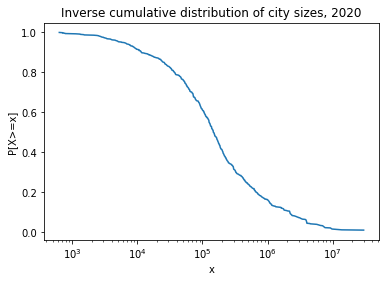

In [6]:
datafile = working_directory + data_file
df = pd.read_csv(datafile)

df = df[df[variable] >= 0]  # Remove any cities that have populations less than zero (caused by raster -9999 masking)

# Generate the inverse cumulative distribution plot
data_2020 = df[variable].sort_values()
X, y = p_X_gt_x(data_2020)

# Render the inverse cumulative distribution plot for 2000
plt.plot(X,y)
plt.xscale('log')
plt.title('Inverse cumulative distribution of city sizes, {year}'.format(year=year))
plt.xlabel('x')
plt.ylabel('P[X>=x]')

## Change detection in inverse cdfs

Text(0,0.5,'2020-2000')

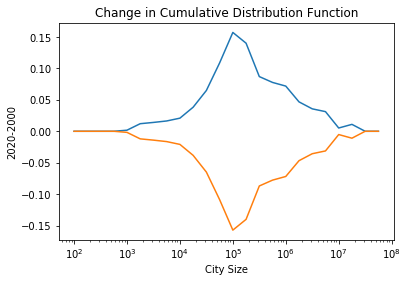

In [7]:
from math import log10, floor, ceil

max_data = ceil(log10(max(max(data_2020),max(data_2000))))  # Find the minimum log scale in the data
min_data = floor(log10(min(min(data_2020),min(data_2000)))) # Find the maximum log scale in the data

values = [pow(10,x) for x in np.arange(min_data,max_data,0.25)] # Generate a list of values for the inverse cdf.

X, y1 = p_X_gt_x(data_2000, X=values)
X, y2 = p_X_gt_x(data_2020, X=values)

plt.plot(X,y2-y1)
plt.xscale('log')
plt.title('Change in Inverse Cumulative Distribution Function')
plt.xlabel('City Size')
plt.ylabel('2020-2000')

X, y1 = p_X_lt_x(data_2000, X=values)
X, y2 = p_X_lt_x(data_2020, X=values)

plt.plot(X,y2-y1)
plt.xscale('log')
plt.title('Change in Cumulative Distribution Function')
plt.xlabel('City Size')
plt.ylabel('2020-2000')



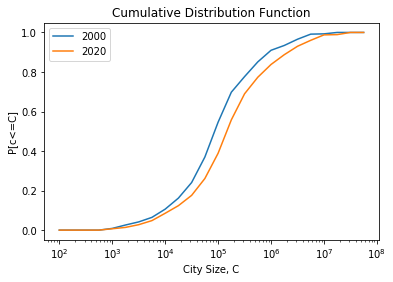

In [12]:
plt.plot(X, y1)
plt.plot(X, y2)
plt.xscale('log')
plt.title('Cumulative Distribution Function')
plt.xlabel('City Size, C')
plt.ylabel('P[c<=C]')
plt.legend(['2000','2020'])